# Gleb Pimenov 1820243077

# Visualization

In [586]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

# Datasets

In [587]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons

# Models

In [588]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Saving

In [589]:
from joblib import dump

# Loading iris dataset

In [590]:
iris = load_iris()
row_count = iris.data.shape[0]
column_count = iris.data.shape[1]
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')

The DataFrame has 150 rows.
The DataFrame has 4 columns.


# Getting features and targets

In [591]:
x = iris.data
y = iris.target

# Define colors and labels for each class

In [592]:
colors = ['red', 'green', 'blue']
labels = ['Setosa', 'Versicolor', 'Virginica']

# Create scatter plot

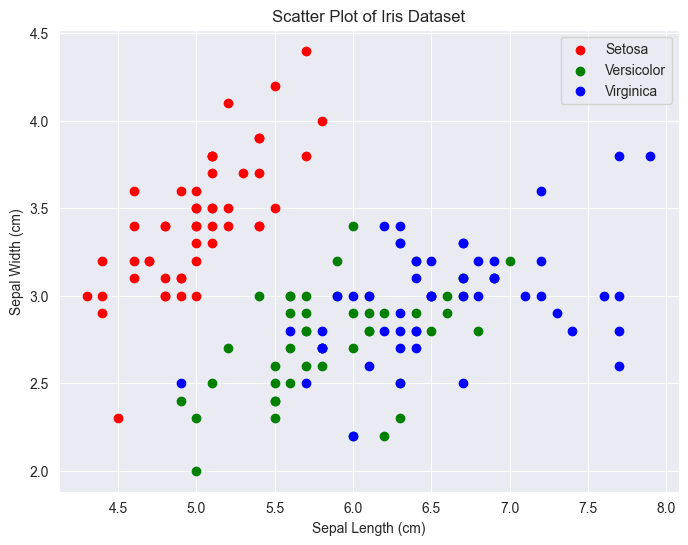

In [593]:
plt.figure(figsize=(8, 6))
for i in range(len(colors)):
    plt.scatter(x[y == i, 0], x[y == i, 1], c=colors[i], label=labels[i])
# Add labels and legend
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Iris Dataset')
plt.legend()
# Show plot
plt.grid(True)
plt.show()

# Splitting data on train and test

In [594]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, shuffle=True)

# Define the parameter grid (for the iterating hyperparameters)

In [595]:
param_grid = {
    'C': [1, 2, 2.1, 2.2, 2.5, 3],
    'dual' : ['auto']
}

# Create the grid search

In [596]:
model = GridSearchCV(LinearSVC(), param_grid, scoring='precision_macro', n_jobs=-1, verbose=3)

# Fitting (training) the model with different parameters and printing the best parameters

In [597]:
model.fit(x_train, y_train)
model.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'C': 2.5, 'dual': 'auto'}

# Saving model

In [598]:
dump(model, "svm_model_iris.joblib")

['svm_model_iris.joblib']

# Predictions

In [599]:
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)

# Create scatter plot

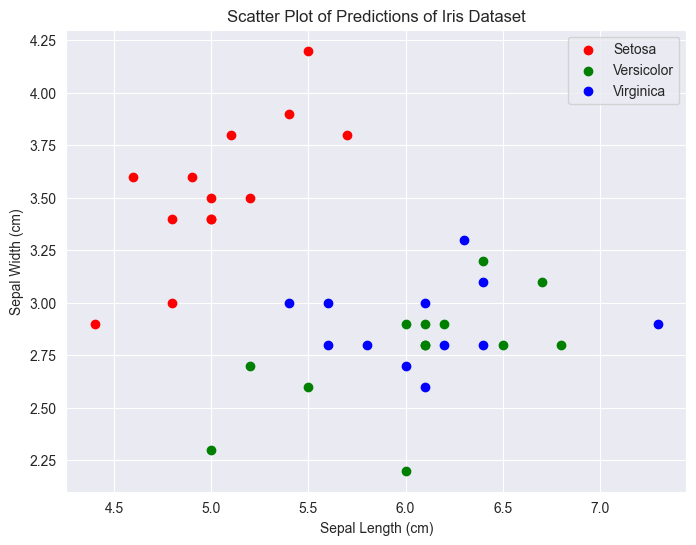

In [600]:
plt.figure(figsize=(8, 6))
for i in range(len(colors)):
    plt.scatter(x_test[y_pred == i, 0], x_test[y_pred == i, 1], c=colors[i], label=labels[i])
# Add labels and legend
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Predictions of Iris Dataset')
plt.legend()
# Show plot
plt.grid(True)
plt.show()

# Classification report

Text(58.222222222222214, 0.5, 'Truth')

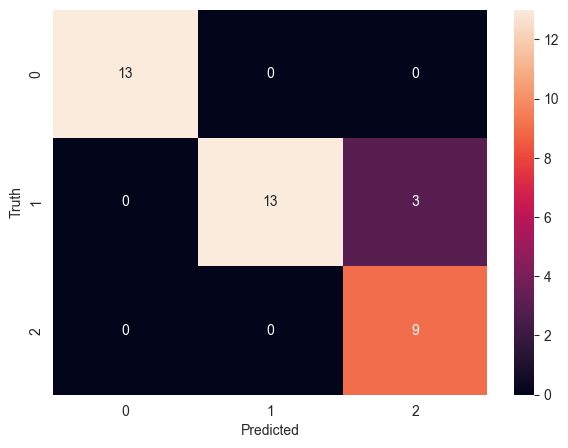

In [601]:
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [602]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.81      0.90        16
           2       0.75      1.00      0.86         9

    accuracy                           0.92        38
   macro avg       0.92      0.94      0.92        38
weighted avg       0.94      0.92      0.92        38


# Loading moons dataset

In [603]:
moons = make_moons(n_samples=300, noise=0.1, random_state=42)
row_count = moons[0].shape[0]
column_count = moons[0].shape[1]
print(f'The DataFrme has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')

The DataFrme has 300 rows.
The DataFrame has 2 columns.


# Setting features and targets

In [604]:
x = moons[0]
y = moons[1]

# Defining colours

In [605]:
colors = ['red', 'blue']
labels = ['First Class', 'Second Class']

# Plotting full dataset

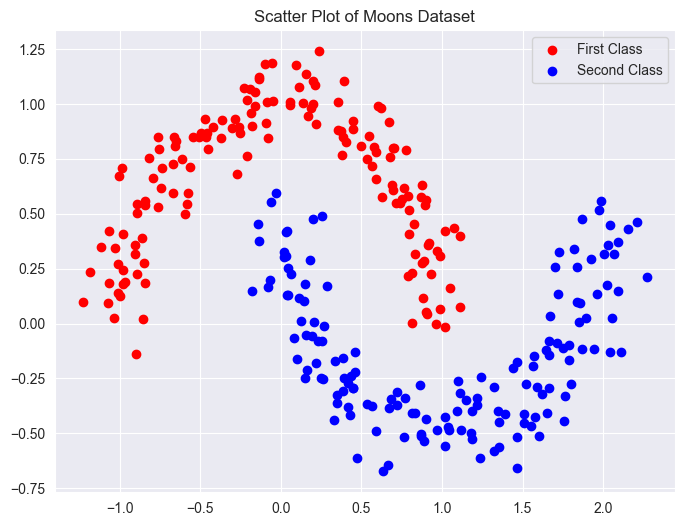

In [606]:
plt.figure(figsize=(8, 6))
for i in range(len(colors)):
    plt.scatter(x[y == i, 0], x[y == i, 1], c=colors[i], label=labels[i])
# Add labels and legend
plt.title('Scatter Plot of Moons Dataset')
plt.legend()
# Show plot
plt.grid(True)
plt.show()

# Splitting data

In [607]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, shuffle=True)

# Setting param grid for the gridsearch (iterating hyperparams)

In [608]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],  # gamma is relevant for 'rbf', 'poly', and 'sigmoid' kernels
    'degree': [2, 3, 4],  # degree is relevant for 'poly' kernel
}

# Defining model

In [609]:
model = GridSearchCV(SVC(), param_grid, scoring='precision_macro', n_jobs=-1, verbose=3)

# Training (fitting) model

In [610]:
model.fit(x_train, y_train)
model.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

# Saving model

In [611]:
dump(model, "svm_model_moons.joblib")

['svm_model_moons.joblib']

# Predicting 

In [612]:
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)

# Plotting predicted data

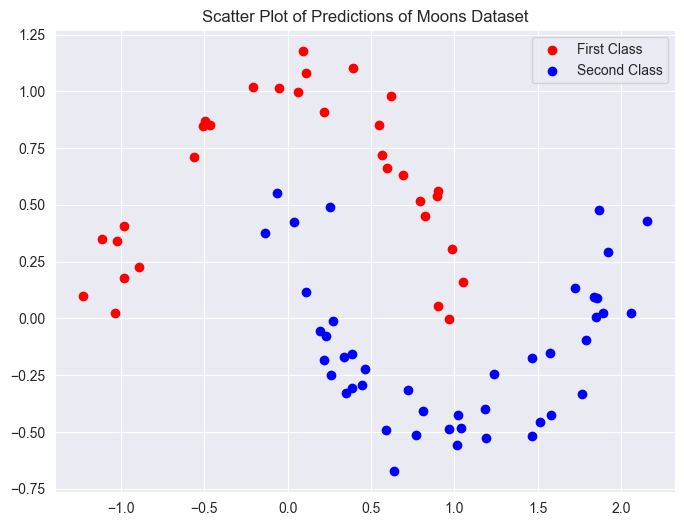

In [613]:
plt.figure(figsize=(8, 6))
for i in range(len(colors)):
    plt.scatter(x_test[y_pred == i, 0], x_test[y_pred == i, 1], c=colors[i], label=labels[i])
# Add labels and legend
plt.title('Scatter Plot of Predictions of Moons Dataset')
plt.legend()
# Show plot
plt.grid(True)
plt.show()

# Classification report

Text(58.222222222222214, 0.5, 'Truth')

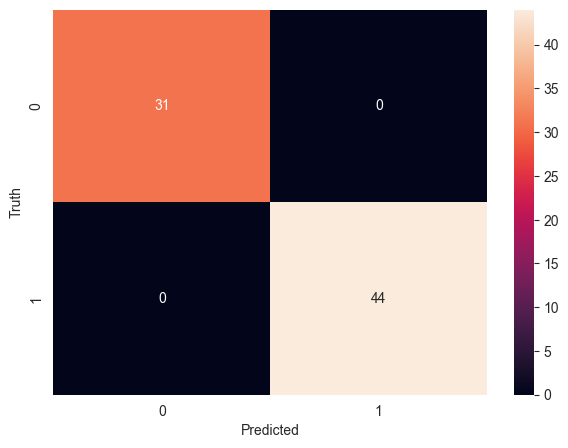

In [614]:
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [615]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        44

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


The metrics show us that the models have done their job perfectly